In [1]:
%load_ext watermark
%watermark -a "Chibuzor Enyioko" -d -v -p numpy,pandas,matplotlib,seaborn,sklearn

Author: Chibuzor Enyioko

Python implementation: CPython
Python version       : 3.13.7
IPython version      : 9.5.0

numpy     : 2.3.3
pandas    : 2.3.2
matplotlib: 3.10.6
seaborn   : 0.13.2
sklearn   : 1.7.2



# Project 1: Decision Trees with Zombies

This notebook explores the zombie data set in order to develop a decision tree model that predicts whether an individual is infected or not based on patterns observed in the provided features. 

## Part 1: Descriptive Analysis

To build a foundation for understanding the data, a descriptive analysis is performed. A histogram of each feature is used to examine their distributions and identify potential relationships.

In [2]:
# import necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

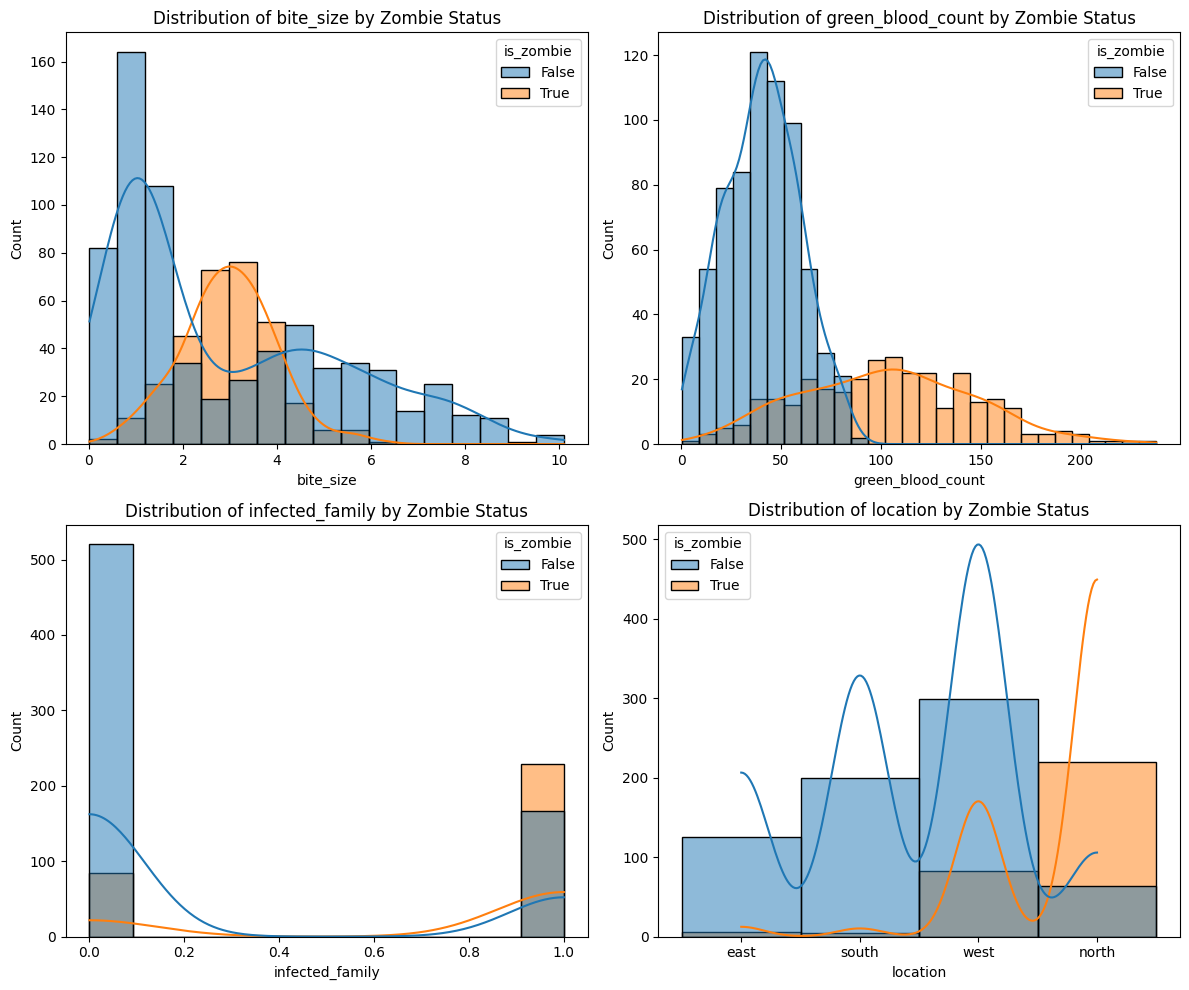

In [3]:
# imoprt zombie training dataset
zombie_df = pd.read_csv('training.csv')

plt_columns = ['bite_size','green_blood_count','infected_family','location']
num_cols = len(plt_columns)

# create subplots for each feature
fig, axes = plt.subplots(2, 2, figsize=(12, 10))
axes = axes.flatten()

for i, col in enumerate(plt_columns):
    sns.histplot(zombie_df, x=col, hue='is_zombie', kde=True, ax=axes[i])
    axes[i].set_title(f'Distribution of {col} by Zombie Status')

plt.tight_layout()
plt.show()

### Summary

From the data, it is observed that:
- Individuals with bites about 2-4 inches wide are likely zombies
- Individuals with <80 cells per thousand is are most likely safe
- Infected family memebers increases the likelihood of being a zombie
- An individual from the North side of the city is likely to be infected
- Green blood and being from the North may carry significant weight in predicting zombie infection

## Part 2: Making the Decision Tree
### Bulding the Model
From here, a model is built based on the training set.


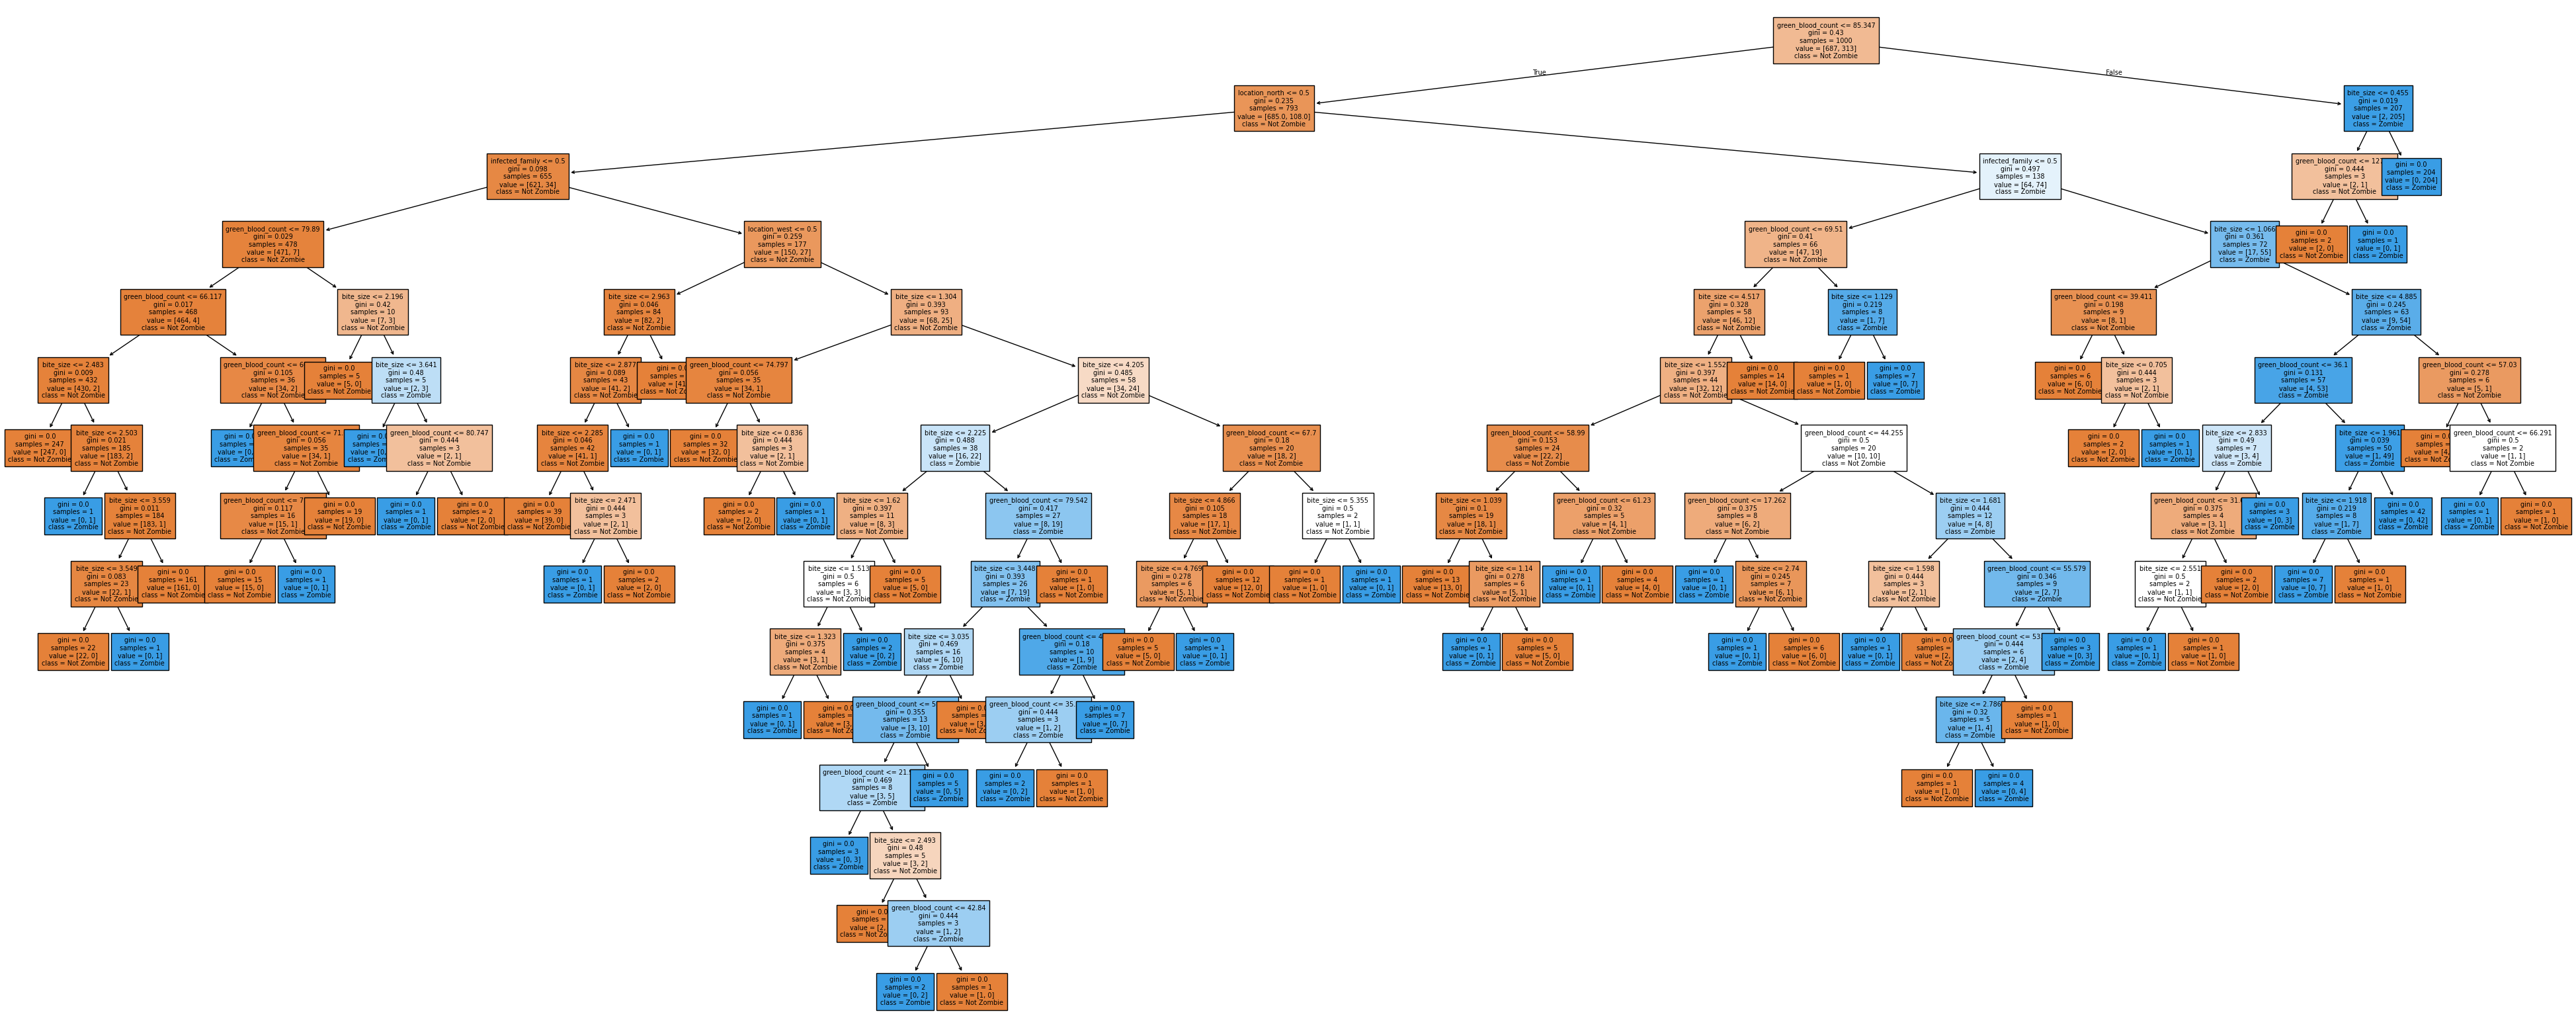

In [4]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import classification_report, confusion_matrix


x = zombie_df.drop(columns=['is_zombie'])
y = zombie_df['is_zombie']

# encode categorical variables as numeric values
x_encoded = pd.get_dummies(x, drop_first=True)

# fitting the decision tree classifier
clf = DecisionTreeClassifier()
clf.fit(x_encoded, y)

# visualize the decision tree
plt.figure(figsize=(50,20))
plot_tree(clf, feature_names=x_encoded.columns, class_names=['Not Zombie', 'Zombie'], filled=True, fontsize=7)
plt.show()  


## Part 3: Evaluating the model
Now that the model is built, it will be applied to the testing set to determine its accuracy.

In [5]:
#import the testing dataset
test_df = pd.read_csv('testing.csv')
x_test = test_df.drop(columns=['is_zombie'])
y_test = test_df['is_zombie']
x_test_encoded = pd.get_dummies(x_test, drop_first=True)

# make predictions on the test set
y_pred = clf.predict(x_test_encoded)

#### Confusion Matrix & Classification Report
A confusion matrix and classification display is generated to understand the evaluation:

              precision    recall  f1-score   support

  Not Zombie      0.938     0.935     0.937       666
      Zombie      0.872     0.877     0.875       334

    accuracy                          0.916      1000
   macro avg      0.905     0.906     0.906      1000
weighted avg      0.916     0.916     0.916      1000



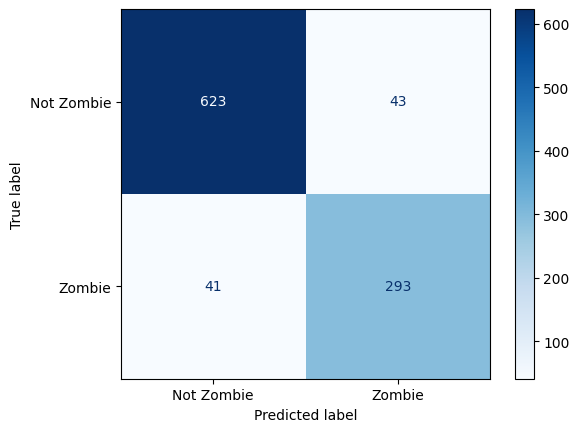

In [6]:
from sklearn.metrics import ConfusionMatrixDisplay

# view the classification report
print(classification_report(y_test, y_pred, target_names=['Not Zombie', 'Zombie'], digits=3))

# print the confusion matrix
cm = confusion_matrix(y_test, y_pred, labels=clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Not Zombie', 'Zombie'])
disp.plot(cmap=plt.cm.Blues)
plt.show()


#### Feature Importance
Some code that displays the significance of the features given to the model.
<a id='feature importance'></a>

In [7]:
importances = clf.feature_importances_
feature_names = x_encoded.columns

# Dataframe for visual of feature importance
importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

# Display the table
print(importance_df)

             Feature  Importance
1  green_blood_count    0.634022
0          bite_size    0.181607
3     location_north    0.124342
2    infected_family    0.047708
5      location_west    0.012321
4     location_south    0.000000


## Part 4: Questions from the assignnment

1. What is the overall accuracy of the classifier? 

The overall accuracy of the classifier is 0.913, or 91.3%.

2. How many (a) false positives and (b) false negatives are there?

There were 41 false positives and 46 false negatives.

3. What did the decision tree decide is the most important initial variable (i.e., the one at the 
top of the tree)? 

The decision tree decided green blood count to be the most important initial variable.

4. How many different times was this variable used?

This variable was used 29 times in the model.

5. Were all the variables used by the decision tree? 

No, from the [Feature Importance](#feature-importance) table, variable "location: South" was not used by the decision tree.

6. What is the accuracy of 5-fold cross validation?  Hint: look at and modify the “Test and Score” widget, which will require the tree and the test data.

